In [31]:
# %matplotlib notebook

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_115K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [34]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.355225,10000,115.002192,4817.954465,-4817.856021,4269.239427,-4269.138151,4817.298400,-4817.318880,4270.340746,-4270.239119,-0.000002,1000000
1,0.001,9000.395557,9000,115.000280,4819.352052,-4819.250030,4271.498434,-4271.452381,4818.806307,-4818.778732,4272.760963,-4272.673491,-0.000002,1000000
2,0.001,8000.414087,8000,115.000433,4820.861953,-4820.815412,4273.912795,-4273.889005,4820.370473,-4820.366072,4275.188129,-4275.013229,-0.000002,1000000
3,0.001,7000.554272,7000,115.000234,4822.413240,-4822.402015,4276.338192,-4276.324572,4821.835056,-4821.902583,4277.583342,-4277.437928,-0.000002,1000000
4,0.001,6000.360327,6000,115.000560,4823.937676,-4823.879194,4278.833894,-4278.763424,4823.448186,-4823.472390,4280.019425,-4279.853129,-0.000002,1000000


In [35]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

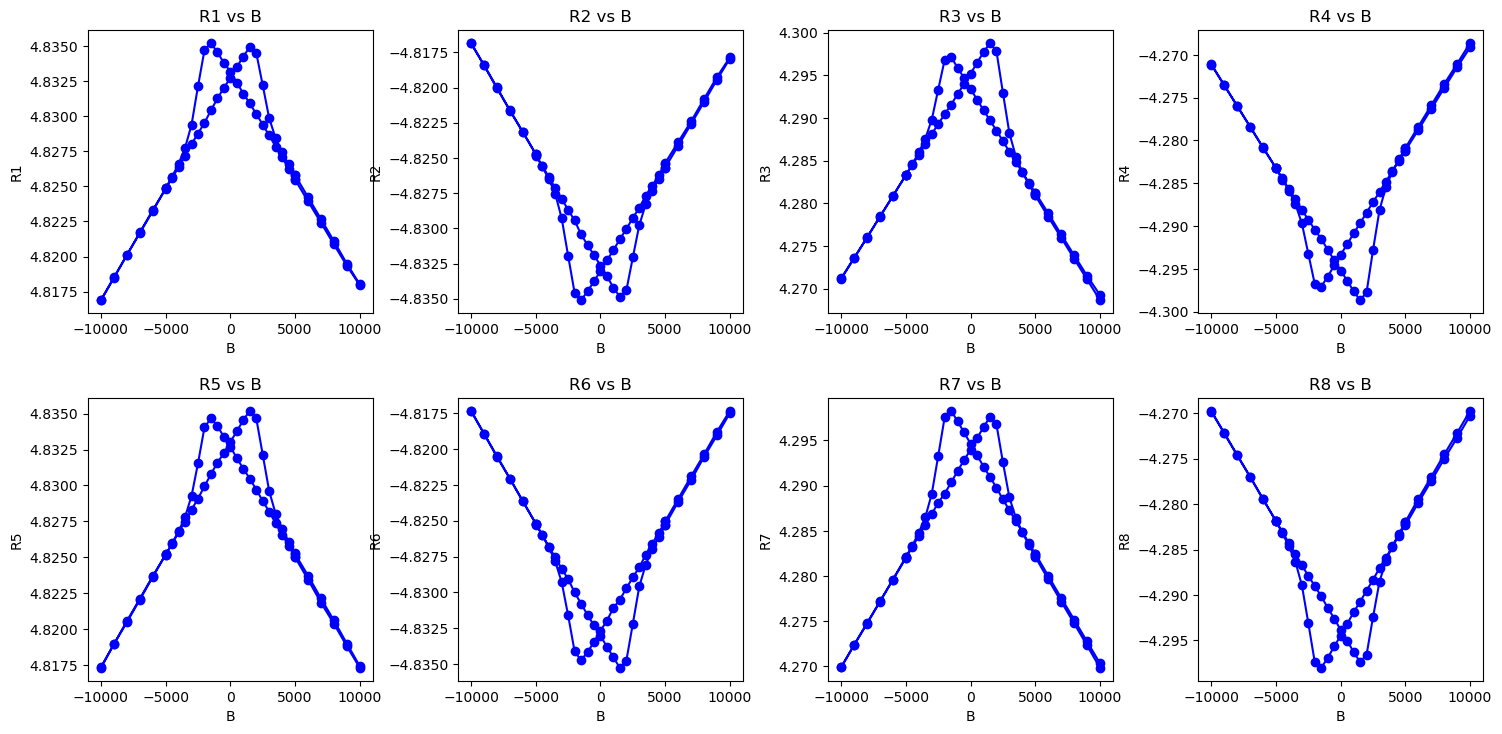

In [36]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [37]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

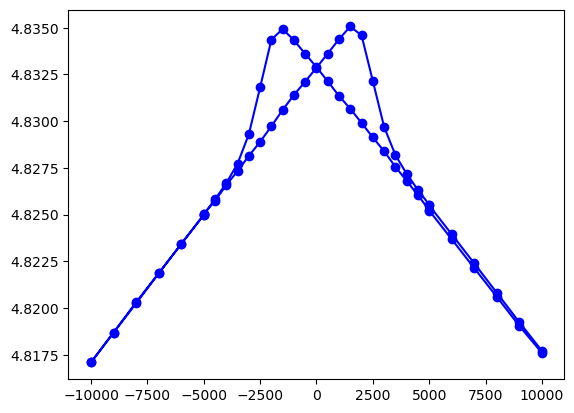

In [38]:
plt.plot(df['B_int'], df['Ra'],'bo-')

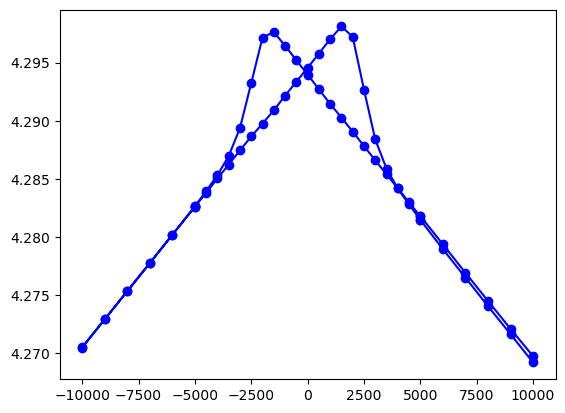

In [39]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

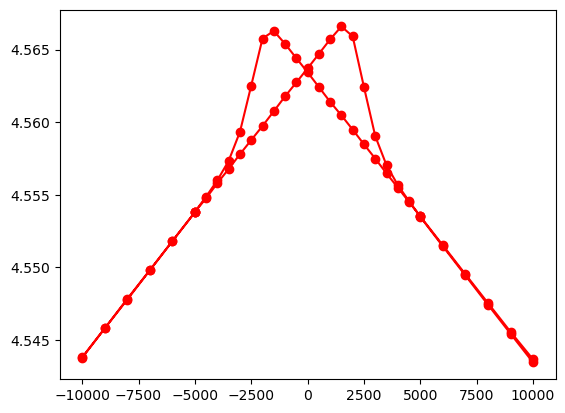

In [40]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [41]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

4.563570233099814

In [42]:
df['MR'] = (df['R'] - R0)/R0*100

In [43]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.435998
1,9000,-0.394399
2,8000,-0.350999
3,7000,-0.307667
4,6000,-0.263923


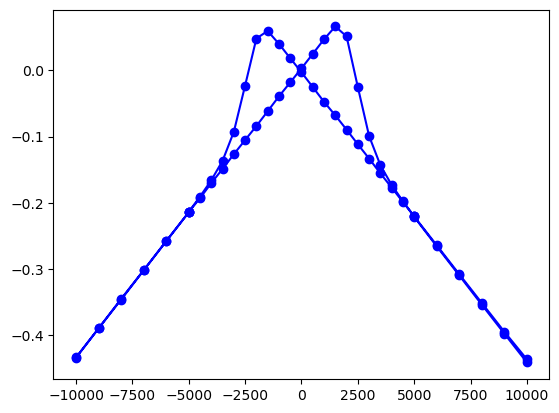

In [44]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [45]:
df.to_pickle('./pickle_data/MR_115K.pkl')

In [46]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,115.002192,4817.954465,-4817.856021,4269.239427,-4269.138151,4817.298400,-4817.318880,...,4.269239,-4.269138,4.817298,-4.817319,4.270341,-4.270239,4.817607,4.269739,4.543673,-0.435998
1,0.001,9000,9000,115.000280,4819.352052,-4819.250030,4271.498434,-4271.452381,4818.806307,-4818.778732,...,4.271498,-4.271452,4.818806,-4.818779,4.272761,-4.272673,4.819047,4.272096,4.545572,-0.394399
2,0.001,8000,8000,115.000433,4820.861953,-4820.815412,4273.912795,-4273.889005,4820.370473,-4820.366072,...,4.273913,-4.273889,4.820370,-4.820366,4.275188,-4.275013,4.820603,4.274501,4.547552,-0.350999
3,0.001,7000,7000,115.000234,4822.413240,-4822.402015,4276.338192,-4276.324572,4821.835056,-4821.902583,...,4.276338,-4.276325,4.821835,-4.821903,4.277583,-4.277438,4.822138,4.276921,4.549530,-0.307667
4,0.001,6000,6000,115.000560,4823.937676,-4823.879194,4278.833894,-4278.763424,4823.448186,-4823.472390,...,4.278834,-4.278763,4.823448,-4.823472,4.280019,-4.279853,4.823684,4.279367,4.551526,-0.263923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000,6000,115.000045,4824.239794,-4824.145504,4278.401611,-4278.376046,4823.725611,-4823.682293,...,4.278402,-4.278376,4.823726,-4.823682,4.279629,-4.279415,4.823948,4.278955,4.551452,-0.265545
62,0.001,7000,7000,115.000174,4822.676344,-4822.591191,4275.966373,-4275.894233,4822.132369,-4822.160631,...,4.275966,-4.275894,4.822132,-4.822161,4.277178,-4.276979,4.822390,4.276504,4.549447,-0.309471
63,0.001,8000,8000,114.999967,4821.100658,-4821.031050,4273.493919,-4273.407916,4820.599431,-4820.549335,...,4.273494,-4.273408,4.820599,-4.820549,4.274769,-4.274525,4.820820,4.274049,4.547435,-0.353576
64,0.001,9000,9000,114.999961,4819.494146,-4819.446132,4271.065142,-4271.040726,4818.990452,-4819.036434,...,4.271065,-4.271041,4.818990,-4.819036,4.272321,-4.272144,4.819242,4.271643,4.545442,-0.397231


In [47]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [48]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,4817.905243,4269.188789,4817.308640,4270.289932,1000000
1,0.001,9000,4819.301041,4271.475408,4818.792520,4272.717227,1000000
2,0.001,8000,4820.838682,4273.900900,4820.368273,4275.100679,1000000
3,0.001,7000,4822.407627,4276.331382,4821.868819,4277.510635,1000000
4,0.001,6000,4823.908435,4278.798659,4823.460288,4279.936277,1000000
...,...,...,...,...,...,...,...
61,0.001,6000,4824.192649,4278.388829,4823.703952,4279.522093,1000000
62,0.001,7000,4822.633768,4275.930303,4822.146500,4277.078571,1000000
63,0.001,8000,4821.065854,4273.450918,4820.574383,4274.647003,1000000
64,0.001,9000,4819.470139,4271.052934,4819.013443,4272.232819,1000000


In [49]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [50]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [51]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [52]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [53]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [54]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [55]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [56]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

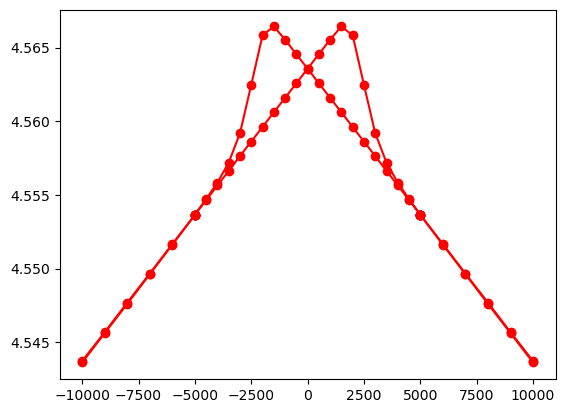

In [57]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')